**Carlo R. Caburnay**

**BSCS-3B**

***Mr. Bernardino***

**Part 1: Part 1: Data Loading and Preprocessing**

# **1. Load the Dataset:**

In [ ]:
import pandas as pd


df = pd.read_csv("onlinefoods.csv")
print(df.head())


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

# **2. Handle Missing Values:**

In [ ]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


Missing values in the dataset:
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


<ipython-input-16-04468ff26a4a>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


# **3. Encode Categorical Variables**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Feedback']

encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_cols], axis=1)
print(df_encoded.head())


   Age Educational Qualifications  Family size  latitude  longitude  Pin code  \
0   20              Post Graduate            4   12.9766    77.5993    560001   
1   24                   Graduate            3   12.9770    77.5773    560009   
2   22              Post Graduate            3   12.9551    77.6593    560017   
3   22                   Graduate            6   12.9473    77.5616    560019   
4   22              Post Graduate            4   12.9850    77.5533    560010   

  Output Unnamed: 12  Gender_Male  Marital Status_Prefer not to say  \
0    Yes         Yes          0.0                               0.0   
1    Yes         Yes          0.0                               0.0   
2    Yes         Yes          1.0                               0.0   
3    Yes         Yes          0.0                               0.0   
4    Yes         Yes          1.0                               0.0   

   Marital Status_Single  Occupation_House wife  Occupation_Self Employeed  \
0       

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **4. Feature Selection**

In [ ]:
selected_features = ['Age', 'Educational Qualifications', 'Family size', 'Pin code', 'Output']
selected_df = df_encoded[selected_features]
print(selected_df.head())

   Age Educational Qualifications  Family size  Pin code Output
0   20              Post Graduate            4    560001    Yes
1   24                   Graduate            3    560009    Yes
2   22              Post Graduate            3    560017    Yes
3   22                   Graduate            6    560019    Yes
4   22              Post Graduate            4    560010    Yes


**Part 2: Exploratory Data Analysis (EDA**

# **1. Descriptive Statistics**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Descriptive Statistics of Numeric Columns:")
print(df.describe())

Descriptive Statistics of Numeric Columns:
              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


# **2. Visualizations**

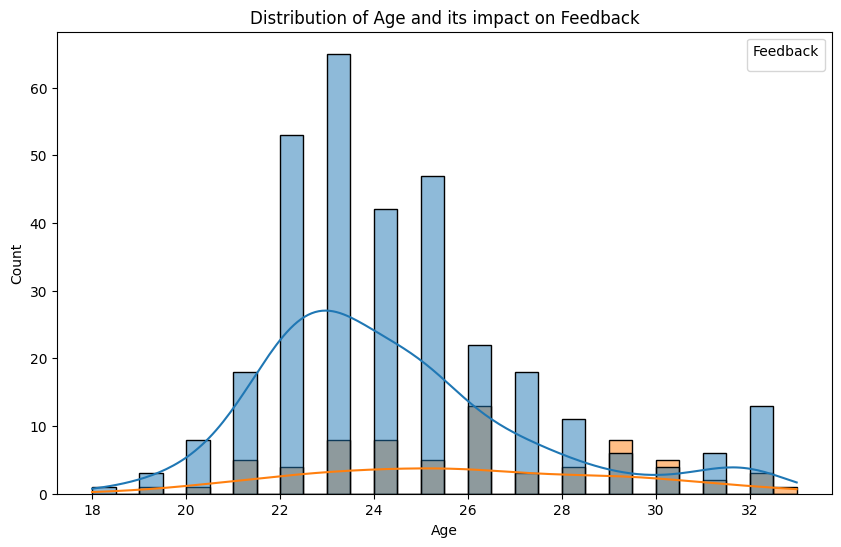

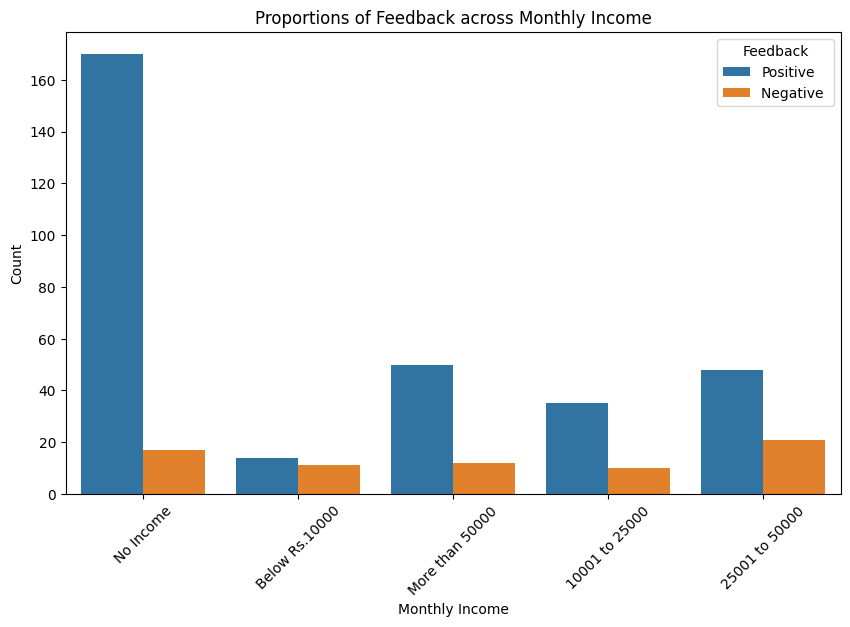

<ipython-input-20-b69360c267cc>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


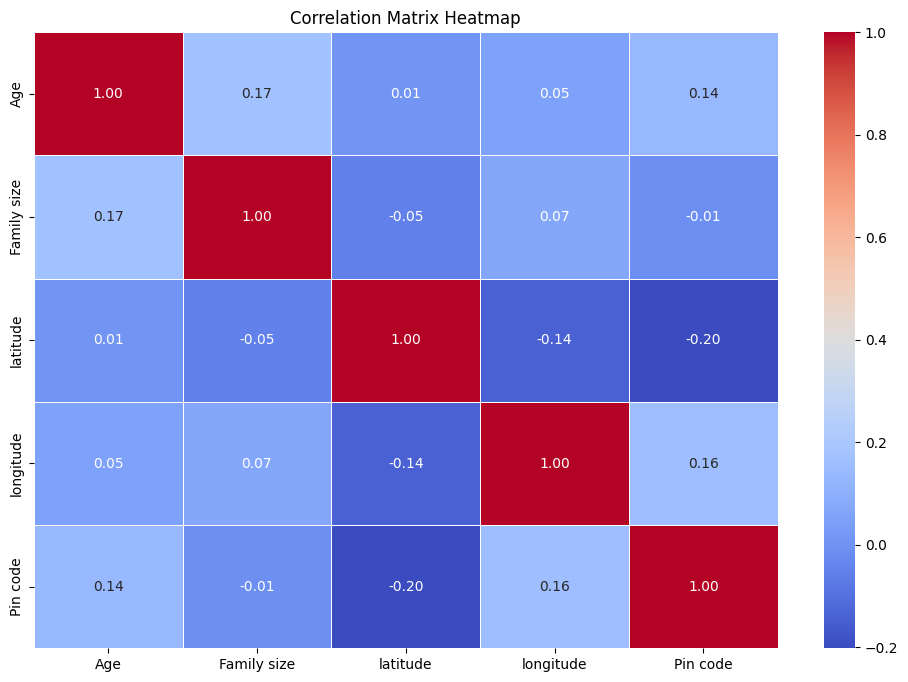

In [ ]:


# Distribution of Age and its impact on Feedback
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', kde=True, bins=30)
plt.title('Distribution of Age and its impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.show()

# Proportions of Feedback across different levels of Monthly Income
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback across Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


**Part 3: Logistic Regression Model**

# **1. Build the Model:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Assuming 'df' is your DataFrame containing the data
X = pd.get_dummies(df.drop(columns=['Feedback']), drop_first=True)
y = df['Feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


Model Evaluation:
Accuracy: 0.8589743589743589
Precision: 0.8589743589743589
Recall: 1.0
Confusion Matrix:
 [[ 0 11]
 [ 0 67]]
